# Лабораторная работа №2
## Задание
Выполнить эквализацию изображения

## Решение
Исходное изображение:

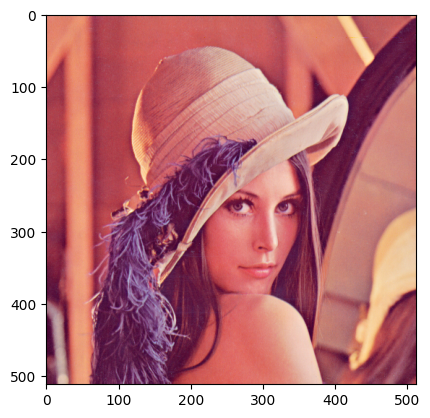

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread('/lenna.png')

rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

Эквализация своими силами

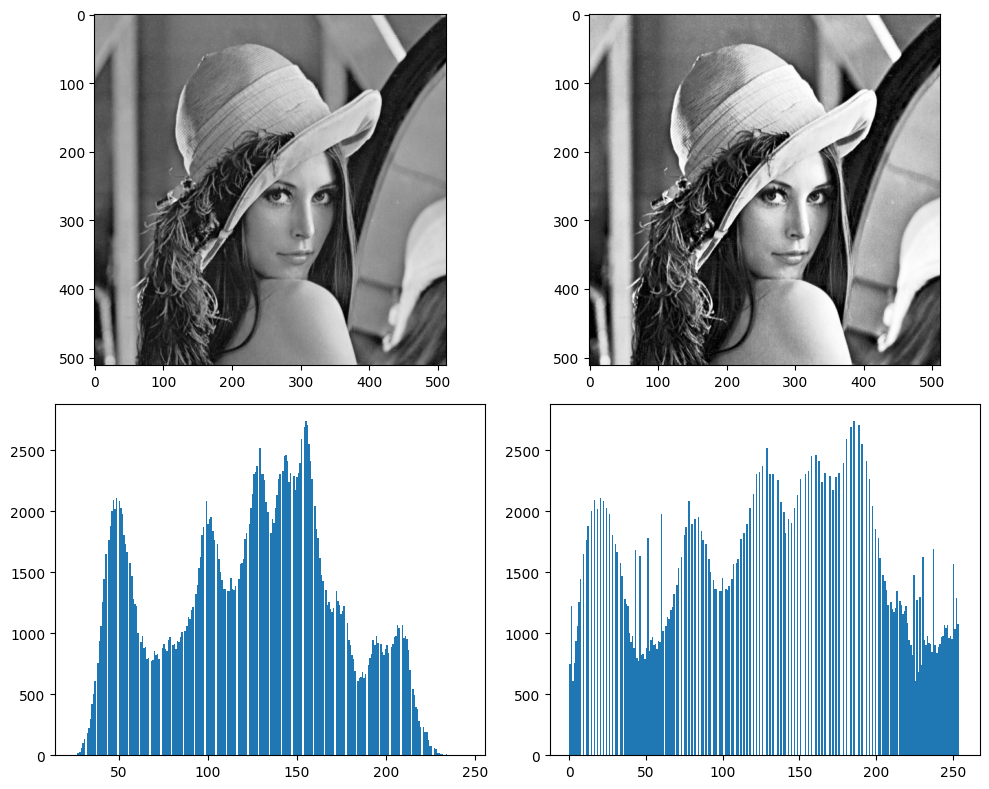

In [43]:
def equalize(img):
    #Подсчет количества пикселей с определенной яркостью
    #индекс - яркость, значение
    res = np.array(np.unique(img, return_counts=True)).T
    histogram_sum = sum(res[:, 1])

    #в lut каждый индекс - уровень серого
    #значение - яркость, которую должен иметь пиксель с яркостью = индексу после эквализации
    lut = np.zeros(256, dtype=np.float32)
    #накопленная сумма
    cumulativeSum = np.cumsum(res[:, 1])

    for i in range(res.shape[0]):
        val = int(res[i, 0])
        lut[val] = 255 * cumulativeSum[i] / histogram_sum

    #в copy яркость пикселя заменяется на значение, установленное для нее в lut
    copy = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixelValue = img[i, j]
            copy[i, j] = lut[pixelValue]

    return copy

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
equalized_image = equalize(gray_image)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))

plt.subplot(gs[0])
plt.imshow(gray_image, cmap='gray')

plt.subplot(gs[1])
plt.imshow(equalized_image, cmap='gray')

plt.subplot(gs[2])
plt.hist(gray_image.ravel(), 256)

plt.subplot(gs[3])
plt.hist(equalized_image.ravel(), 256)

plt.tight_layout()
plt.show()

Эквализация средствами OpenCV

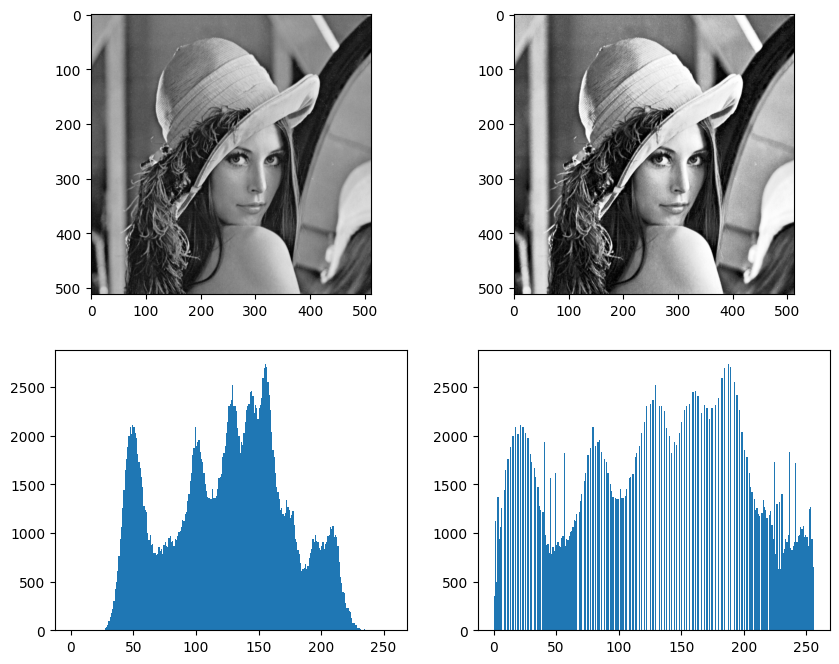

In [39]:
equalized_image = cv.equalizeHist(gray_image)
gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))

plt.subplot(gs[0])
plt.imshow(gray_image, cmap='gray')

plt.subplot(gs[1])
plt.imshow(equalized_image, cmap='gray')

plt.subplot(gs[2])
plt.hist(gray_image.ravel(), bins=256, range=[0,256])

plt.subplot(gs[3])
plt.hist(equalized_image.ravel(), bins=256, range=[0,256])

plt.show()